# 데이터 설명
0. 기본 지식¶

index : 인덱스

gender : 성별

car : 차량 소유 여부

reality : 부동산 소유 여부

child_num : 자녀 수

income_total : 연간 소득

income_type : 소득 분류

Commercial associate > 자영업자

Working > 노동자

State servant > 공무원

Pensioner > 연금수령자

student > 학생

edu_type : 교육 수준

Higher education > 대학교육

Secondary / secondary special > 고등교육

Incomplete higher > 불완전한 고등 교육(중퇴)

Lower secondary > 중등교육

Academic degree > 학위

family_type : 결혼 여부

Married > 기혼

Civil marriage > 사실혼

Separated > 이혼

Single / not married > 싱글

Widow > 사별

house_type : 생활 방식

Municipal apartment > 시립 아파트

House / apartment > 주택 / 아파트

With parents > 부모님과 같이 살고있음

Co-op apartment > 주택 조합

Rented apartment > 빌린 아파트(전/월세)

Office apartment > 오피스텔

DAYS_BIRTH : 출생일

(0)부터 역으로 셈, (-1)은 태어난지 하루가 되었다는 의미

DAY_EMPLOYED : 업무 시작일

(0)부터 역으로 셈, (-1)은 취직한지 하루가 되었다는 의미

FLAG_MOBIL : 핸드폰 소유 여부, 개인용 핸드폰

work_phone : 업무용 전화 소유 여부, 업무용 핸드폰
phone : 전화 소유여부, 집 전화

email : 이메일 소유 여부

occyp_type : 직업 유형

family_size : 가족 규모

begin_month : 신용카드 발급(월)


credit : 사용자의 신용카드 대금 연체를 기준으로 한 시용도

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)                 #기초 준비

import warnings
warnings.filterwarnings("ignore")#waring을 무시하도록 처리

# 1. 훈련용/테스트 데이터 준비, 정보확인

In [5]:
data = pd.read_csv("../data2/train.csv")
data.head() #데이터 읽어오기

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [6]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [15]:
data[data['family_size'] == ]['child_num'].mean()

0.0013701311411235075

In [16]:
data[data['family_size'] == 2]['child_num'].mean()

0.06160499078406352

In [12]:
data[data['family_size'] == 3]['child_num'].mean()

1.0259067357512954

In [13]:
data[data['family_size'] == 4]['child_num'].mean()

2.008407079646018

In [14]:
data[data['family_size'] == 5]['child_num'].mean()

3.013745704467354

In [17]:
data[data['family_size'] == 2]['credit'].mean()

1.5258046221466042

In [18]:
data[data['family_size'] == 1]['credit'].mean()

1.5051869250342533

In [21]:
corr = data.corr()
corr

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
index,1.000000,0.001012,0.009848,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.002867,0.002181,-0.007841
child_num,0.001012,1.000000,0.032186,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,0.890530,-0.007229,0.004081
income_total,0.009848,0.032186,1.000000,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,0.023839,-0.018047,0.008555
DAYS_BIRTH,-0.008901,0.332816,0.064155,1.000000,-0.616776,NaN,0.178752,-0.029247,0.111238,0.298108,0.057306,-0.025187
DAYS_EMPLOYED,0.004259,-0.228159,-0.166478,-0.616776,1.000000,NaN,-0.241827,-0.007749,-0.091090,-0.223077,0.007964,-0.003798
FLAG_MOBIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_phone,-0.005575,0.051521,-0.034207,0.178752,-0.241827,NaN,1.000000,0.310256,-0.031048,0.068705,-0.008563,-0.003134
phone,-0.001790,-0.010555,0.019013,-0.029247,-0.007749,NaN,0.310256,1.000000,0.012494,-0.000132,-0.014286,0.003452
email,0.005332,0.016120,0.089882,0.111238,-0.091090,NaN,-0.031048,0.012494,1.000000,0.016122,0.002320,0.014812
family_size,-0.002867,0.890530,0.023839,0.298108,-0.223077,NaN,0.068705,-0.000132,0.016122,1.000000,-0.023032,0.008227


In [4]:
data_train = data

In [5]:
data_test = pd.read_csv("../data2/test.csv")

In [6]:
data_train.info()#데이터타입, null값 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
data_train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [8]:
data_train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [10]:
select_feature2 = ['gender', 'car', 'reality', 'income_total', 'income_type', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [11]:
data_test = data_test[select_feature2]
data_test.head() #테스트 데이터도 마찬가지로 선택한 데이터만!

,gender,car,reality,income_total,income_type,family_size,family_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,M,Y,N,112500.0,Pensioner,2.0,Civil marriage,-21990,365243,-60.0
1,F,N,Y,135000.0,State servant,2.0,Married,-18964,-8671,-36.0
2,F,N,Y,69372.0,Working,2.0,Married,-15887,-217,-40.0
3,M,Y,N,112500.0,Commercial associate,2.0,Married,-19270,-2531,-41.0
4,F,Y,Y,225000.0,State servant,2.0,Married,-17822,-9385,-8.0


In [12]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         10000 non-null  object 
 1   car            10000 non-null  object 
 2   reality        10000 non-null  object 
 3   income_total   10000 non-null  float64
 4   income_type    10000 non-null  object 
 5   family_size    10000 non-null  float64
 6   family_type    10000 non-null  object 
 7   DAYS_BIRTH     10000 non-null  int64  
 8   DAYS_EMPLOYED  10000 non-null  int64  
 9   begin_month    10000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


# 2. 더미변수 처리
### 성별, 차 유무, 부동산 유무, 소, 교육 수준, 집유형, 휴대폰 소유, 업무용 전화 소유, 이메일 소유, 직업 유형을 더미변수 처리하였다.

In [13]:
gender_dummy = pd.get_dummies(data_train['gender'])
#pd.get_dummies(데이터프레임 gender열을 가져와 데이터프레임화하였다.
gender_dummy

,F,M
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
26452,1,0
26453,1,0
26454,1,0
26455,0,1


In [14]:
data_train = pd.merge(data_train, gender_dummy, on=data_train.index)

In [15]:
select_feature3 = ['F', 'M', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']
#key_0 없애기 + 컬럼 위치 조절

In [16]:
data_train = data_train[select_feature3]

In [17]:
data_train.head()

,F,M,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [18]:
car_dummy = pd.get_dummies(data_train['car']) #car도 명목형 데이터 
car_dummy

,N,Y
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
26452,1,0
26453,1,0
26454,0,1
26455,1,0


In [19]:
data_train = pd.merge(data_train, car_dummy, on=data_train.index)

In [20]:
data_train.head()

,key_0,F,M,car,reality,child_num,income_total,income_type,edu_type,family_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,N,Y
0,0,1,0,N,N,0,202500.0,Commercial associate,Higher education,Married,...,1,0,0,0,NaN,2.0,-6.0,1.0,1,0
1,1,1,0,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,1,0,0,1,Laborers,3.0,-5.0,1.0,1,0
2,2,0,1,Y,Y,0,450000.0,Working,Higher education,Married,...,1,0,1,0,Managers,2.0,-22.0,2.0,0,1
3,3,1,0,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,1,0
4,4,1,0,Y,Y,0,157500.0,State servant,Higher education,Married,...,1,0,0,0,Managers,2.0,-26.0,2.0,0,1


In [21]:
select_feature4 = ['F', 'M', 'N', 'Y', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [22]:
data_train = data_train[select_feature4]
data_train.head()

,F,M,N,Y,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,N,0,202500.0,Commercial associate,Higher education,Married,...,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,Y,0,450000.0,Working,Higher education,Married,...,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,Y,0,157500.0,State servant,Higher education,Married,...,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [23]:
data_train.columns = ['F', 'M', 'no_car', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email','occyp_type',
        'family_size', 'begin_month', 'credit']


In [24]:
data_train

,F,M,no_car,car,reality,child_num,income_total,income_type,edu_type,family_type,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,N,0,202500.0,Commercial associate,Higher education,Married,...,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,Y,0,450000.0,Working,Higher education,Married,...,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,...,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,Y,0,157500.0,State servant,Higher education,Married,...,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,N,2,225000.0,State servant,Secondary / secondary special,Married,...,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,1,0,1,0,Y,1,180000.0,Working,Higher education,Separated,...,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,1,0,0,1,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,...,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,0,1,1,0,Y,0,171000.0,Working,Incomplete higher,Single / not married,...,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [25]:
reality_dummy = pd.get_dummies(data_train['reality'])
reality_dummy

,N,Y
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
26452,1,0
26453,0,1
26454,1,0
26455,0,1


In [26]:
data_train = pd.merge(data_train, reality_dummy, on=data_train.index)
data_train.head()

,key_0,F,M,no_car,car,reality,child_num,income_total,income_type,edu_type,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,N,Y
0,0,1,0,1,0,N,0,202500.0,Commercial associate,Higher education,...,1,0,0,0,NaN,2.0,-6.0,1.0,1,0
1,1,1,0,1,0,Y,1,247500.0,Commercial associate,Secondary / secondary special,...,1,0,0,1,Laborers,3.0,-5.0,1.0,0,1
2,2,0,1,0,1,Y,0,450000.0,Working,Higher education,...,1,0,1,0,Managers,2.0,-22.0,2.0,0,1
3,3,1,0,1,0,Y,0,202500.0,Commercial associate,Secondary / secondary special,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,0,1
4,4,1,0,0,1,Y,0,157500.0,State servant,Higher education,...,1,0,0,0,Managers,2.0,-26.0,2.0,0,1


In [27]:
select_feature5 = ['F', 'M', 'no_car', 'car', 'N', 'Y', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [28]:
data_train = data_train[select_feature5]
data_train.head()

,F,M,no_car,car,N,Y,child_num,income_total,income_type,edu_type,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,Commercial associate,Higher education,...,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,...,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,Working,Higher education,...,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,...,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,State servant,Higher education,...,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [29]:
data_train.columns = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [30]:
data_train

,F,M,no_car,car,no_reality,reality,child_num,income_total,income_type,edu_type,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,Commercial associate,Higher education,...,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,Commercial associate,Secondary / secondary special,...,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,Working,Higher education,...,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,Commercial associate,Secondary / secondary special,...,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,State servant,Higher education,...,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,1,0,2,225000.0,State servant,Secondary / secondary special,...,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,1,0,1,0,0,1,1,180000.0,Working,Higher education,...,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,1,0,0,1,1,0,0,292500.0,Working,Secondary / secondary special,...,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,0,1,1,0,0,1,0,171000.0,Working,Incomplete higher,...,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [31]:
incomeType_dummy = pd.get_dummies(data_train['income_type']) #더미변수 
# 5개 유형 간에 서로 가중치를 부여하지 않게 1~5, 0~4으로 수치를 넣지 않고 더미변수로 처리
incomeType_dummy

,Commercial associate,Pensioner,State servant,Student,Working
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
26452,0,0,1,0,0
26453,0,0,0,0,1
26454,0,0,0,0,1
26455,0,0,0,0,1


In [32]:
data_train = pd.merge(data_train, incomeType_dummy, on=data_train.index)
# pandas에서 제공하는 merge 함수로 본래의 데이터 프레임하고 합친다. 

In [33]:
select_feature6 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num', 'income_total',
       'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']
# key0이라는 열을 제거하고 열 간의 순서를 원하는데로 정렬하기 위한 리스트

In [34]:
data_train = data_train[select_feature6] #선택한 열을 원하는 순서대로 넣는다.
data_train.head() 

,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,Pensioner,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,1,0,...,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,1,0,...,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,0,0,...,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,1,0,...,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,0,0,...,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [35]:
data_train.columns = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality','child_num',
       'income_total',  'Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [36]:
data_train

,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,Pensioner,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,1,0,...,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,1,0,...,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,0,0,...,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,1,0,...,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,0,0,...,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,1,0,2,225000.0,0,0,...,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,1,0,1,0,0,1,1,180000.0,0,0,...,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,1,0,0,1,1,0,0,292500.0,0,0,...,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,0,1,1,0,0,1,0,171000.0,0,0,...,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [37]:
workP_dummy = pd.get_dummies(data_train['work_phone'])
workP_dummy

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
26452,1,0
26453,1,0
26454,1,0
26455,1,0


In [38]:
data_train = pd.merge(data_train, workP_dummy, on=data_train.index)

In [39]:
data_train.head()

,key_0,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,...,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit,0,1
0,0,1,0,1,0,1,0,0,202500.0,1,...,1,0,0,0,NaN,2.0,-6.0,1.0,1,0
1,1,1,0,1,0,0,1,1,247500.0,1,...,1,0,0,1,Laborers,3.0,-5.0,1.0,1,0
2,2,0,1,0,1,0,1,0,450000.0,0,...,1,0,1,0,Managers,2.0,-22.0,2.0,1,0
3,3,1,0,1,0,0,1,0,202500.0,1,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,1,0
4,4,1,0,0,1,0,1,0,157500.0,0,...,1,0,0,0,Managers,2.0,-26.0,2.0,1,0


In [40]:
select_feature7 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality','child_num', 'income_total', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working', 
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 0, 1, 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [41]:
data_train = data_train[select_feature7]
data_train.head()


,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,Pensioner,...,DAYS_EMPLOYED,FLAG_MOBIL,0,1,phone,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,1,0,...,-4709,1,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,1,0,...,-1540,1,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,0,0,...,-4434,1,1,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,1,0,...,-2092,1,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,0,0,...,-2105,1,1,0,0,0,Managers,2.0,-26.0,2.0


In [42]:
data_train.columns = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality','child_num', 'income_total', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'not_work_phone', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [43]:
phone_dummy = pd.get_dummies(data_train['phone'])
phone_dummy

,0,1
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
26452,1,0
26453,1,0
26454,1,0
26455,1,0


In [44]:
data_train = pd.merge(data_train, phone_dummy, on=data_train.index)
data_train.head()

,key_0,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,...,not_work_phone,work_phone,phone,email,occyp_type,family_size,begin_month,credit,0,1
0,0,1,0,1,0,1,0,0,202500.0,1,...,1,0,0,0,NaN,2.0,-6.0,1.0,1,0
1,1,1,0,1,0,0,1,1,247500.0,1,...,1,0,0,1,Laborers,3.0,-5.0,1.0,1,0
2,2,0,1,0,1,0,1,0,450000.0,0,...,1,0,1,0,Managers,2.0,-22.0,2.0,0,1
3,3,1,0,1,0,0,1,0,202500.0,1,...,1,0,1,0,Sales staff,2.0,-37.0,0.0,0,1
4,4,1,0,0,1,0,1,0,157500.0,0,...,1,0,0,0,Managers,2.0,-26.0,2.0,1,0


In [45]:
select_feature8 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num', 'income_total', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'not_work_phone', 'work_phone', 0, 1, 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [46]:
data_train = data_train[select_feature8]
data_train.head()

,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,Pensioner,...,FLAG_MOBIL,not_work_phone,work_phone,0,1,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,1,0,...,1,1,0,1,0,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,1,0,...,1,1,0,1,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,0,0,...,1,1,0,0,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,1,0,...,1,1,0,0,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,0,0,...,1,1,0,1,0,0,Managers,2.0,-26.0,2.0


In [47]:
data_train.columns

Index([                   'F',                    'M',               'no_car',
                        'car',           'no_reality',              'reality',
                  'child_num',         'income_total', 'Commercial associate',
                  'Pensioner',        'State servant',              'Student',
                    'Working',             'edu_type',          'family_type',
                 'house_type',           'DAYS_BIRTH',        'DAYS_EMPLOYED',
                 'FLAG_MOBIL',       'not_work_phone',           'work_phone',
                            0,                      1,                'email',
                 'occyp_type',          'family_size',          'begin_month',
                     'credit'],
      dtype='object')

In [48]:
data_train.columns = [ 'F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num', 'income_total', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working',
       'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'not_work_phone', 'work_phone', 'not_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit']

In [49]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [50]:
email_dummy = pd.get_dummies(data_train['email'])
email_dummy

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
26452,1,0
26453,1,0
26454,1,0
26455,1,0


In [51]:
data_train = pd.merge(data_train, email_dummy, on=data_train.index)
data_train.head()

,key_0,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,...,work_phone,not_phone,phone,email,occyp_type,family_size,begin_month,credit,0,1
0,0,1,0,1,0,1,0,0,202500.0,1,...,0,1,0,0,NaN,2.0,-6.0,1.0,1,0
1,1,1,0,1,0,0,1,1,247500.0,1,...,0,1,0,1,Laborers,3.0,-5.0,1.0,0,1
2,2,0,1,0,1,0,1,0,450000.0,0,...,0,0,1,0,Managers,2.0,-22.0,2.0,1,0
3,3,1,0,1,0,0,1,0,202500.0,1,...,0,0,1,0,Sales staff,2.0,-37.0,0.0,1,0
4,4,1,0,0,1,0,1,0,157500.0,0,...,0,1,0,0,Managers,2.0,-26.0,2.0,1,0


In [52]:
data_train.columns

Index([               'key_0',                    'F',                    'M',
                     'no_car',                  'car',           'no_reality',
                    'reality',            'child_num',         'income_total',
       'Commercial associate',            'Pensioner',        'State servant',
                    'Student',              'Working',             'edu_type',
                'family_type',           'house_type',           'DAYS_BIRTH',
              'DAYS_EMPLOYED',           'FLAG_MOBIL',       'not_work_phone',
                 'work_phone',            'not_phone',                'phone',
                      'email',           'occyp_type',          'family_size',
                'begin_month',               'credit',                      0,
                            1],
      dtype='object')

In [53]:
select_feature9 = ['F',                    'M',
                     'no_car',                  'car',           'no_reality',
                    'reality', 'child_num',         'income_total', 'Commercial associate',
                  'Pensioner',        'State servant',              'Student',
                    'Working',                       'edu_type',
                'family_type',           'house_type',           'DAYS_BIRTH',
              'DAYS_EMPLOYED',           'FLAG_MOBIL',       'not_work_phone',
                 'work_phone',            'not_phone',                'phone',
                      0, 1,           'occyp_type',          'family_size',
                'begin_month',               'credit']

In [54]:
data_train = data_train[select_feature9]

In [55]:
data_train.columns = ['F',                    'M',
                     'no_car',                  'car',           'no_reality',
                    'reality', 'child_num',         'income_total', 'Commercial associate',
                  'Pensioner',        'State servant',              'Student',
                    'Working',                       'edu_type',
                'family_type',           'house_type',           'DAYS_BIRTH',
              'DAYS_EMPLOYED',           'FLAG_MOBIL',       'not_work_phone',
                 'work_phone',            'not_phone',                'phone',
                      'not_email', 'email',           'occyp_type',          'family_size',
                'begin_month',               'credit']

In [56]:
data_train.head()

,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,Pensioner,...,not_work_phone,work_phone,not_phone,phone,not_email,email,occyp_type,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,1,0,...,1,0,1,0,1,0,NaN,2.0,-6.0,1.0
1,1,0,1,0,0,1,1,247500.0,1,0,...,1,0,1,0,0,1,Laborers,3.0,-5.0,1.0
2,0,1,0,1,0,1,0,450000.0,0,0,...,1,0,0,1,1,0,Managers,2.0,-22.0,2.0
3,1,0,1,0,0,1,0,202500.0,1,0,...,1,0,0,1,1,0,Sales staff,2.0,-37.0,0.0
4,1,0,0,1,0,1,0,157500.0,0,0,...,1,0,1,0,1,0,Managers,2.0,-26.0,2.0


In [57]:
data_train = data_train.fillna({'occyp_type':'Unknown'})

In [58]:
occ_dummy = pd.get_dummies(data_train['occyp_type'])
occ_dummy

,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Unknown,Waiters/barmen staff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
26454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [59]:
data_train = pd.merge(data_train, occ_dummy, on=data_train.index)

In [60]:
data_train.columns

Index(['key_0', 'F', 'M', 'no_car', 'car', 'no_reality', 'reality',
       'child_num', 'income_total', 'Commercial associate', 'Pensioner',
       'State servant', 'Student', 'Working', 'edu_type', 'family_type',
       'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
       'email', 'occyp_type', 'family_size', 'begin_month', 'credit',
       'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Unknown', 'Waiters/barmen staff'],
      dtype='object')

In [61]:
select_feature10 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num',
       'income_total', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working',  'edu_type', 'family_type',
       'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
       'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Waiters/barmen staff', 'Unknown', 'family_size', 'begin_month', 'credit',
      ]

In [62]:
data_train = data_train[select_feature10]

In [63]:
data_train.columns = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num',
       'income_total', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working',  'edu_type', 'family_type',
       'house_type', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
       'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Waiters/barmen staff','Unknown', 'family_size', 'begin_month', 'credit',
      ]

In [64]:
data_train.columns

Index(['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num',
       'income_total', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working', 'edu_type', 'family_type', 'house_type',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'not_work_phone',
       'work_phone', 'not_phone', 'phone', 'not_email', 'email', 'Accountants',
       'Cleaning staff', 'Cooking staff', 'Core staff', 'Drivers', 'HR staff',
       'High skill tech staff', 'IT staff', 'Laborers', 'Low-skill Laborers',
       'Managers', 'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff',
       'Unknown', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [65]:
house_dummy = pd.get_dummies(data_train['house_type'])
house_dummy

,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,0,1,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
26452,0,1,0,0,0,0
26453,0,1,0,0,0,0
26454,0,0,0,0,0,1
26455,0,1,0,0,0,0


In [66]:
data_train = pd.merge(data_train, house_dummy, on=data_train.index)

In [67]:
select_feature11 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num',
       'income_total', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working',  'edu_type', 'family_type',
       'Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment', 'With parents', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
       'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Waiters/barmen staff','Unknown', 'family_size', 'begin_month', 'credit'
      ]

In [68]:
data_train = data_train[select_feature11]

In [69]:
data_train.columns

Index(['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num',
       'income_total', 'Commercial associate', 'Pensioner', 'State servant',
       'Student', 'Working', 'edu_type', 'family_type', 'Co-op apartment',
       'House / apartment', 'Municipal apartment', 'Office apartment',
       'Rented apartment', 'With parents', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'FLAG_MOBIL', 'not_work_phone', 'work_phone', 'not_phone', 'phone',
       'not_email', 'email', 'Accountants', 'Cleaning staff', 'Cooking staff',
       'Core staff', 'Drivers', 'HR staff', 'High skill tech staff',
       'IT staff', 'Laborers', 'Low-skill Laborers', 'Managers',
       'Medicine staff', 'Private service staff', 'Realty agents',
       'Sales staff', 'Secretaries', 'Security staff', 'Waiters/barmen staff',
       'Unknown', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [70]:
edu_dummy = pd.get_dummies(data_train['edu_type'])
edu_dummy

,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,0,0,0,0,1
4,0,1,0,0,0
...,...,...,...,...,...
26452,0,0,0,0,1
26453,0,1,0,0,0
26454,0,0,0,0,1
26455,0,0,1,0,0


In [71]:
data_train = pd.merge(data_train, edu_dummy, on=data_train.index)

In [72]:
select_feature12 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality',
       'income_total', 'Commercial associate', 'Pensioner', 'State servant',
     'Student', 'Working', 'child_num', 'Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special',  'family_type',
      'Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment', 'With parents', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
     'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
      'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
      'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
      'Security staff', 'Waiters/barmen staff','Unknown', 'family_size', 'begin_month', 'credit'
     ]

In [73]:
data_train = data_train[select_feature12]

# 3. 이상값, 음수 처리 

In [74]:
data_train['DAYS_EMPLOYED'] =  data_train['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
#람다함수로 이상값 처리, 양수가 극단적으로 크게 잡혀있으므로

In [75]:
data_train['DAYS_EMPLOYED'] = abs(data_train['DAYS_EMPLOYED'])
 #음수 값 들 양수화

In [76]:
data_train['DAYS_BIRTH'] = abs(data_train['DAYS_BIRTH'])

In [77]:
data_train['begin_month'] = abs(data_train['begin_month'])

In [78]:
data_train.columns

Index(['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'income_total',
       'Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working', 'child_num', 'Academic degree', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Secondary / secondary special',
       'family_type', 'Co-op apartment', 'House / apartment',
       'Municipal apartment', 'Office apartment', 'Rented apartment',
       'With parents', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
       'email', 'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
       'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
       'Security staff', 'Waiters/barmen staff', 'Unknown', 'family_size',
       'begin_month', 'credit'],
      dtype='object')

# 4. family_type 두 분류로 묶고 더미변수처리

In [79]:
data_train.loc[data_train['family_type'] == 'Civil marriage', 'family_type'] = 'Married'
 #loc(조건에 만족하는 행,열) = 'Married'로 치환

In [80]:
data_train.loc[data_train['family_type'] != 'Married', 'family_type'] = 'not_Married'
#loc( 조건에 만족하는 행,열) = 'not_Narried'로 치환

In [81]:
data_train

,F,M,no_car,car,no_reality,reality,income_total,Commercial associate,Pensioner,State servant,...,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Unknown,family_size,begin_month,credit
0,1,0,1,0,1,0,202500.0,1,0,0,...,0,0,0,0,0,0,1,2.0,6.0,1.0
1,1,0,1,0,0,1,247500.0,1,0,0,...,0,0,0,0,0,0,0,3.0,5.0,1.0
2,0,1,0,1,0,1,450000.0,0,0,0,...,0,0,0,0,0,0,0,2.0,22.0,2.0
3,1,0,1,0,0,1,202500.0,1,0,0,...,0,0,1,0,0,0,0,2.0,37.0,0.0
4,1,0,0,1,0,1,157500.0,0,0,1,...,0,0,0,0,0,0,0,2.0,26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,1,0,225000.0,0,0,1,...,0,0,0,0,0,0,0,4.0,2.0,1.0
26453,1,0,1,0,0,1,180000.0,0,0,0,...,0,0,0,0,0,0,1,2.0,47.0,2.0
26454,1,0,0,1,1,0,292500.0,0,0,0,...,0,0,0,0,0,0,0,2.0,25.0,2.0
26455,0,1,1,0,0,1,171000.0,0,0,0,...,0,0,0,0,0,0,0,1.0,59.0,2.0


In [82]:
familyType_dummy = pd.get_dummies(data_train['family_type'])
#위에서 했던 것과 동일하게 
familyType_dummy

,Married,not_Married
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
26452,1,0
26453,0,1
26454,1,0
26455,0,1


In [83]:
select_feature13 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'child_num',
      'income_total', 'Commercial associate', 'Pensioner', 'State servant',
      'Student', 'Working', 'Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special',  'Married', 'not_Married',
      'Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment', 'With parents', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
      'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
      'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
      'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
       'Low-skill Laborers', 'Managers', 'Medicine staff',
       'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
      'Security staff', 'Waiters/barmen staff','Unknown', 'family_size', 'begin_month', 'credit']

In [84]:
data_train = pd.merge(data_train, familyType_dummy, on=data_train.index)

In [85]:
data_train = data_train[select_feature13]
data_train.head()

,F,M,no_car,car,no_reality,reality,child_num,income_total,Commercial associate,Pensioner,...,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Unknown,family_size,begin_month,credit
0,1,0,1,0,1,0,0,202500.0,1,0,...,0,0,0,0,0,0,1,2.0,6.0,1.0
1,1,0,1,0,0,1,1,247500.0,1,0,...,0,0,0,0,0,0,0,3.0,5.0,1.0
2,0,1,0,1,0,1,0,450000.0,0,0,...,0,0,0,0,0,0,0,2.0,22.0,2.0
3,1,0,1,0,0,1,0,202500.0,1,0,...,0,0,1,0,0,0,0,2.0,37.0,0.0
4,1,0,0,1,0,1,0,157500.0,0,0,...,0,0,0,0,0,0,0,2.0,26.0,2.0


# 5. 스케일링-MinMaxScaler사용
####  income_total, DAYS_BIRTH, DAYS_EMPLYED 컬럼 스케일링

In [86]:
from sklearn import preprocessing
#NinMaxScaler 를 위한 import

In [87]:
col = ['child_num','income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'family_size']#스케일링 할 열

In [88]:
x = data_train[col].values  #value 가져오기
x

array([[0.0000e+00, 2.0250e+05, 1.3899e+04, 4.7090e+03, 6.0000e+00,
        2.0000e+00],
       [1.0000e+00, 2.4750e+05, 1.1380e+04, 1.5400e+03, 5.0000e+00,
        3.0000e+00],
       [0.0000e+00, 4.5000e+05, 1.9087e+04, 4.4340e+03, 2.2000e+01,
        2.0000e+00],
       ...,
       [0.0000e+00, 2.9250e+05, 1.0082e+04, 2.0150e+03, 2.5000e+01,
        2.0000e+00],
       [0.0000e+00, 1.7100e+05, 1.0145e+04, 1.0700e+02, 5.9000e+01,
        1.0000e+00],
       [0.0000e+00, 8.1000e+04, 1.9569e+04, 1.0130e+03, 9.0000e+00,
        2.0000e+00]])

In [89]:
min_max_scaler = preprocessing.MinMaxScaler()
 # value, MinMaxScaler처리 준비 0~1 상대값으로 다룰 것이므로 

In [90]:
x_scaled = min_max_scaler.fit_transform(x.astype(float))
#MinMaxScaler처리 . 실수!

In [91]:
x_scaled

array([[0.        , 0.11337209, 0.35501805, 0.29968816, 0.1       ,
        0.05263158],
       [0.05263158, 0.14244186, 0.21063793, 0.09800802, 0.08333333,
        0.10526316],
       [0.        , 0.27325581, 0.65237577, 0.28218672, 0.36666667,
        0.05263158],
       ...,
       [0.        , 0.17151163, 0.13624119, 0.12823776, 0.41666667,
        0.05263158],
       [0.        , 0.09302326, 0.13985212, 0.00680965, 0.98333333,
        0.        ],
       [0.        , 0.03488372, 0.68000229, 0.06446891, 0.15      ,
        0.05263158]])

In [92]:
data_train_norm = pd.DataFrame(x_scaled, columns=col)
# 위의 배열 데이터프레임화

In [93]:
data_train_norm

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,family_size
0,0.000000,0.113372,0.355018,0.299688,0.100000,0.052632
1,0.052632,0.142442,0.210638,0.098008,0.083333,0.105263
2,0.000000,0.273256,0.652376,0.282187,0.366667,0.052632
3,0.000000,0.113372,0.423167,0.133138,0.616667,0.052632
4,0.000000,0.084302,0.420244,0.133966,0.433333,0.052632
...,...,...,...,...,...,...
26452,0.105263,0.127907,0.250702,0.126265,0.033333,0.157895
26453,0.052632,0.098837,0.434803,0.157513,0.783333,0.052632
26454,0.000000,0.171512,0.136241,0.128238,0.416667,0.052632
26455,0.000000,0.093023,0.139852,0.006810,0.983333,0.000000


In [94]:
col2 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality',
     'Commercial associate', 'Pensioner', 'State servant',
      'Student', 'Working', 'Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special', 'Married', 'not_Married',
      'Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment', 'With parents', 'FLAG_MOBIL',
      'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
      'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
      'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
      'Low-skill Laborers', 'Managers', 'Medicine staff',
      'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
      'Security staff', 'Waiters/barmen staff','Unknown', 'credit']

In [95]:
data_train_norm[col2] = data_train[col2]
 #위에서 새로 만든 데이터프레임에 나머지 열 붙이기 
data_train_norm.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,family_size,F,M,no_car,car,...,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Unknown,credit
0,0.000000,0.113372,0.355018,0.299688,0.100000,0.052632,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1.0
1,0.052632,0.142442,0.210638,0.098008,0.083333,0.105263,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0.000000,0.273256,0.652376,0.282187,0.366667,0.052632,0,1,0,1,...,1,0,0,0,0,0,0,0,0,2.0
3,0.000000,0.113372,0.423167,0.133138,0.616667,0.052632,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
4,0.000000,0.084302,0.420244,0.133966,0.433333,0.052632,1,0,0,1,...,1,0,0,0,0,0,0,0,0,2.0


# 6. edu_type 수치화

In [96]:
#tmp = []

In [97]:
#for x in data_train_norm['edu_type']:
#    if x == 'Academic degree':
 #       tmp.append(5)
  #  elif x == 'Higher education':
   #     tmp.append(4)
    #elif x == 'Incomplete higher':
     #   tmp.append(3)
    #elif x == 'Lower secondory':
     #   tmp.append(1)
    #else:
     #   tmp.append(2)

In [98]:
#data_train_norm['edu_type'] = tmp
#data_train_norm

#### ------------------------------------------------------------------------------------------------------------------------
# 시각화해서 인사이트 제시

In [99]:
import seaborn as sns #그래프 추가 displot
from matplotlib.ticker import MaxNLocator #눈금을 위한 설정

In [100]:
data_train2 = pd.read_csv("../data2/train.csv")

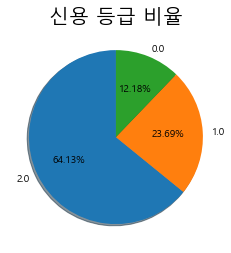

In [101]:
plt.pie(data_train_norm['credit'].value_counts(), labels = data_train_norm['credit'].value_counts().index,
       autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('신용 등급 비율', size=20)
plt.show()
#파이그래프로 각 등급의 비율 알아보기

### 2등급, 1등급, 0등급(하, 중, 상) 순으로 비율이 높다. 
### 특히 2등급의 비율이 극단적으로 높다.

In [102]:
train_0 = data_train_norm[data_train_norm['credit']==0.0]
train_1 = data_train_norm[data_train_norm['credit']==1.0]
train_2 = data_train_norm[data_train_norm['credit']==2.0]

#### 상황에 따라 더미변수 처리, 스케일링 처리 안한 것들이 더 
#### 직관적인 시각화가 가능하므로 본래의 데이터도 준비한다


In [103]:
data_train2 = pd.read_csv("../data2/train.csv")

#### 다른 전처리 말고 이상값, 음수처리는 시각화를 위해서 필요하기에 여기서도 진행해준다.

In [104]:
data_train2['DAYS_EMPLOYED'] =  data_train2['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)

In [105]:
data_train2['DAYS_EMPLOYED'] = abs(data_train2['DAYS_EMPLOYED'])
 #음수 값 들 양수화

In [106]:
data_train2['DAYS_BIRTH'] = abs(data_train2['DAYS_BIRTH'])

In [107]:
data_train2['begin_month'] = abs(data_train2['begin_month'])

In [108]:
train_00 = data_train2[data_train2['credit']==0.0]
train_01 = data_train2[data_train2['credit']==1.0]
train_02 = data_train2[data_train2['credit']==2.0] #다시 그룹별

In [109]:
# 함수로 시각화도구 미리 만들기
def cat_plot(column):
    f, ax = plt.subplots(1, 3, figsize=(16, 6))
    sns.countplot(x = column,
                 data = train_00,
                 ax = ax[0],
                 order = train_00[column].value_counts().index)
    ax[0].tick_params(labelsize=12)
    ax[0].set_title('credit = 0')
    ax[0].set_ylabel('count')
    ax[0].tick_params(rotation=50)
    
    sns.countplot(x = column,
                 data = train_01,
                 ax = ax[1],
                 order = train_01[column].value_counts().index)
    ax[1].tick_params(labelsize=12)  #눈금 사이즈, 간격
    ax[1].set_title('credit = 1')
    ax[1].set_ylabel('count')
    ax[1].tick_params(rotation=50)
    
    sns.countplot(x = column,
                 data = train_02,
                 ax = ax[2],
                 order = train_02[column].value_counts().index)
    ax[2].tick_params(labelsize=12)
    ax[2].set_title('credit = 2')
    ax[2].set_ylabel('count')
    ax[2].tick_params(rotation=50)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

## 1) 신용 등급 별 성별 차이

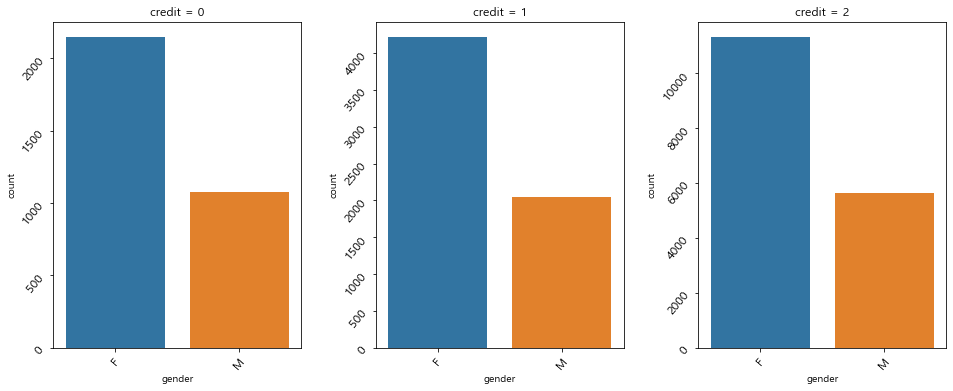

In [110]:
cat_plot("gender") 

#### 성별은 동일한 분포이다. 유의미한 차이를 보이지 않는다.

## 2) 신용 등급별 차량 소유 차이

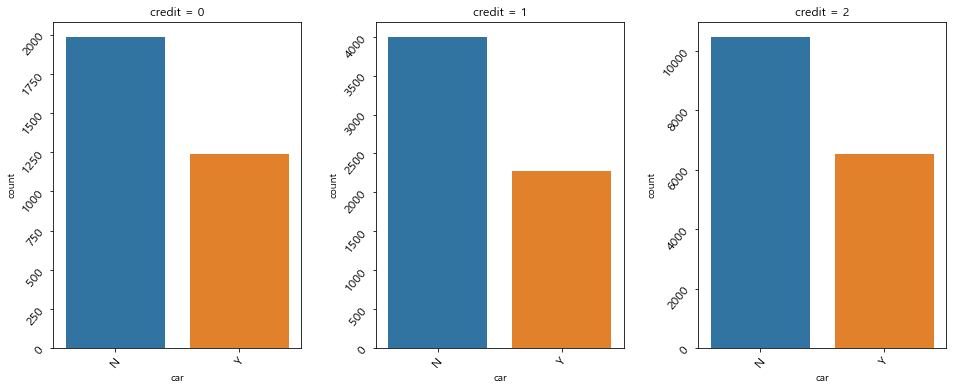

In [111]:
cat_plot("car")

#### 차 유무 역시 동일한 분포이다. 유의미한 차이를 보이지 않는다.¶

## 3) 신용 등급 별 부동산 소유 차이

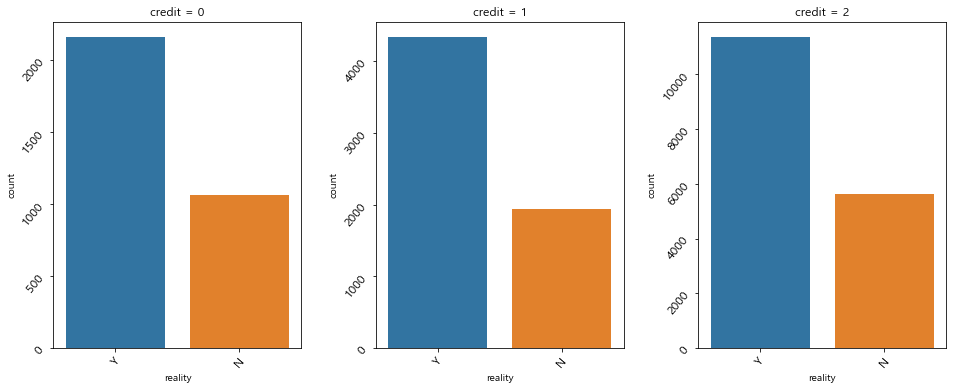

In [112]:
cat_plot('reality')

#### 부동산 유무는 모두 동일한 분포이다. 유의미한 차이를 보이지 않는다

## 4) 파이그래프로 수입 유형별 비율 나타내기

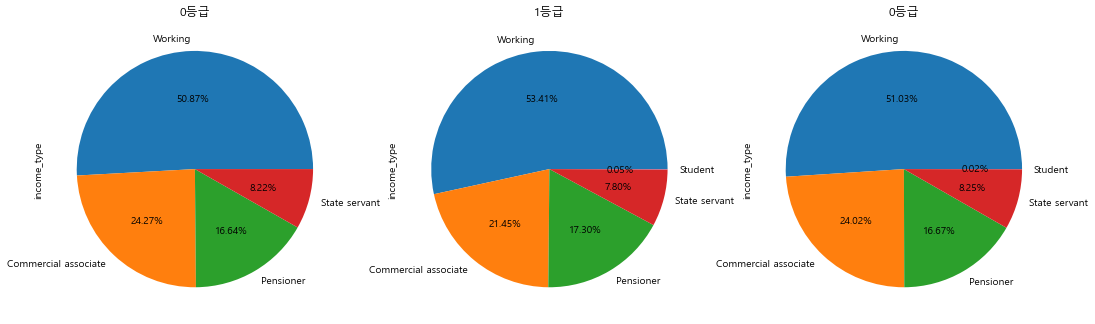

In [113]:
f,ax=plt.subplots(1,3,figsize=(18,12)) #1행에 3개 그래프 다루기

train_00['income_type'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('0등급')                   #파이그래프 소수점 두자리까지

train_01['income_type'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('1등급')

train_02['income_type'].value_counts().plot.pie(autopct='%1.2f%%',ax=ax[2])
ax[2].set_title('0등급')
plt.show()

#### 0~2등급 모든 그래프에서 비율 상으론 큰 차이는 없다.
#### 하지만 0등급 그래프에는 학생(수입유형)이 없으며 1~2등급 그래프에만 학생이 있다.
#### 해당 특이값을 명확히 확인할 필요가 있다.
***


### 4-2) 특이값 확인

In [114]:
train_00[train_00['income_type'] == 'Student']['income_type'].count()

0

In [115]:
train_01[train_01['income_type'] == 'Student']['income_type'].count()

3

In [116]:
train_02[train_02['income_type'] == 'Student']['income_type'].count()

4

구체적인 숫자로는 0등급(신용 상등급)에는 학생이 없고 1등급(신용 중등급)에는 3명, 2등급(하등급)에는 4명이 있다.

In [117]:
train_00['income_total'].mean()

190807.58240223464

In [118]:
train_01['income_total'].mean()

181122.70153183342

In [119]:
train_02['income_total'].mean()

188925.66699080623

등급별 전체 수입 유형의 평균 수익을 파악해보았다. 이 부분은 등급 간 큰 차이가 없다

In [120]:
train_01[train_01['income_type'] == 'Student']['income_total'].mean()

171000.0

In [121]:
train_02[train_02['income_type'] == 'Student']['income_total'].mean()

132750.0

In [122]:
a = train_01['income_total'].mean() - train_01[train_01['income_type'] == 'Student']['income_total'].mean()
b = train_02['income_total'].mean() - train_02[train_02['income_type'] == 'Student']['income_total'].mean()
b / a

5.549473805401406

#### 0등급에는 학생이 없기에 기술하지 않았다.

#### 신용 등급을 측정할 떄 수익이 불투명한 학생의 경우 0 등급을 받을 수 없지 않을 것이라 예측할 수 있다.

#### 신용 1등급 전체 수입 평균에서 신용 1등급 학생들의 수입 평균을 뺀 값은 신용 2등급 전체 수입 평균에서 
#### 신용 2등급 학생들의 수입 평균을 뺀 값의 약 5.5배 나오는 것을 확인할 수 있다.
##### 즉 2등급에 속한 학생들이 특히나  평균 연간 수익은 전체 평균 연간 수익에 비해 큰 차이를 보인다.
##### 학생이 신용등급이 낮아지는 것은 수익과 밀접한 연관이 있을 것이라 예측할 수 있다.

### 추가작업: 수입 유형별 기술 통계

In [123]:
train_00[train_00['income_type'] == 'Working']['income_total'].mean()

186127.06985967053

In [124]:
train_01[train_01['income_type'] == 'Working']['income_total'].mean()

176996.70645354048

In [125]:
train_02[train_02['income_type'] == 'Working']['income_total'].mean()

183854.8265966047

#### 노동자는 평균과 큰 차이가 없다

In [126]:
train_00[train_00['income_type'] == 'State servant']['income_total'].mean()

217682.83018867925

In [127]:
train_01[train_01['income_type'] == 'State servant']['income_total'].mean()

202833.12883435583

In [128]:
train_02[train_02['income_type'] == 'State servant']['income_total'].mean()

205088.91428571427

#### 공무원의 경우 전체적으로 수입이 평균보다 높다

In [129]:
train_00[train_00['income_type'] == 'Pensioner']['income_total'].mean()

148010.54104477612

In [130]:
train_01[train_01['income_type'] == 'Pensioner']['income_total'].mean()

150229.6978782288

In [131]:
train_02[train_02['income_type'] == 'Pensioner']['income_total'].mean()

150038.16808059384

#### 연금수령자는 전체적으로 수입이 평균보다 낮다. '연금'이라는 점을 생각하면 당연하다.

In [132]:
train_00[train_00['income_type'] == 'Commercial associate']['income_total'].mean()

220844.19820971866

In [133]:
train_01[train_01['income_type'] == 'Commercial associate']['income_total'].mean()

208437.94754464287

In [134]:
train_02[train_02['income_type'] == 'Commercial associate']['income_total'].mean()

221191.93240922474

#### 자영업자의 평균 수익은 전체 평균보다 전체적으로 높다.

In [135]:
data_train2['credit'].mean()

1.5195600408209549

In [136]:
data_train2[data_train2['income_type'] == 'Commercial associate']['credit'].mean()

1.5311189938729441

In [137]:
data_train2[data_train2['income_type'] == 'Pensioner']['credit'].mean()

1.5153967183636772

In [138]:
data_train2[data_train2['income_type'] == 'State servant']['credit'].mean()

1.5269266480965644

In [139]:
data_train2[data_train2['income_type'] == 'Working']['credit'].mean()

1.5144741663613046

In [140]:
data_train2[data_train2['income_type'] == 'Student']['credit'].mean()

1.5714285714285714

#### 유형별 신용등급은 크게 차이가 없다.

### ----------------------------------------------------------------------------------
#### 동일한 형식의 두 함수로 본래의 데이터와 전처리를 끝낸 데이터를 
#### 상황에 따라 시각화할 준비를 한다.

In [141]:
#함수로 수치데이터 시각화 준비
def num_plot(column):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    sns.distplot(train_0[column],
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('credit = 0')
    axes[0].set_ylabel('count')
    
    sns.distplot(train_1[column],
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('credit = 1')
    axes[1].set_ylabel('count')
    
    sns.distplot(train_2[column],
                ax = axes[2])
    axes[2].tick_params(labelsize=12)
    axes[2].set_title('credit = 2')
    axes[2].set_ylabel('count')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

In [142]:
def num_plot2(column):
    fig, axes = plt.subplots(1, 3, figsize=(16, 6))
    sns.distplot(train_00[column],
                ax = axes[0])
    axes[0].tick_params(labelsize=12)
    axes[0].set_title('credit = 0')
    axes[0].set_ylabel('count')
    
    sns.distplot(train_01[column],
                ax = axes[1])
    axes[1].tick_params(labelsize=12)
    axes[1].set_title('credit = 1')
    axes[1].set_ylabel('count')
    
    sns.distplot(train_02[column],
                ax = axes[2])
    axes[2].tick_params(labelsize=12)
    axes[2].set_title('credit = 2')
    axes[2].set_ylabel('count')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

## 5) 신용 등급 별 연간 소득 차이

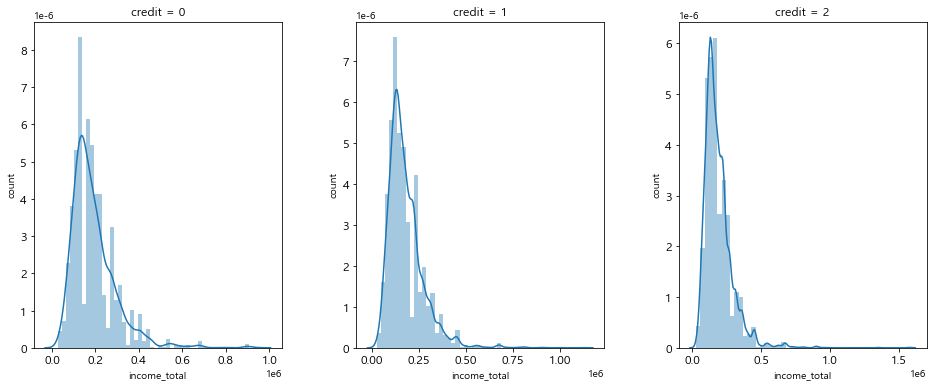

In [143]:
num_plot2("income_total")

#### 2등급에 가장 많은 수입을 가진 사람이 있다.
#### 이 그래프로는 각 등급별 차이가 유의미하게 보이지 않는다.

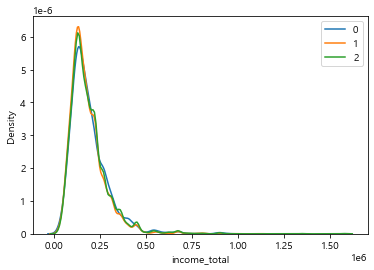

In [144]:
sns.distplot(train_00['income_total'],label='0', hist=False)
sns.distplot(train_01['income_total'],label='1', hist=False)
sns.distplot(train_02['income_total'],label='2', hist=False)
plt.legend()

#### 1등급이 가장 많은 사람이 몰려있다.

## 6) 신용 등급 별 얼마나 살았는가 차이

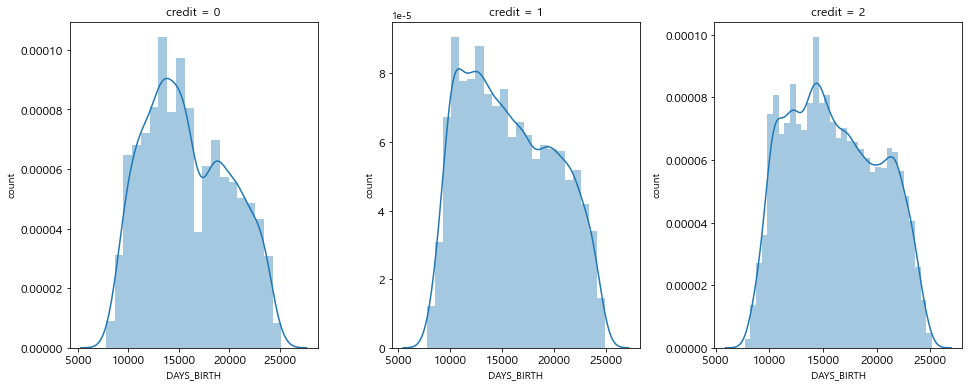

In [145]:
num_plot2("DAYS_BIRTH")

#### 차이가 존재한다. 그래프를 겹쳐서 확인해볼 필요가 있다.

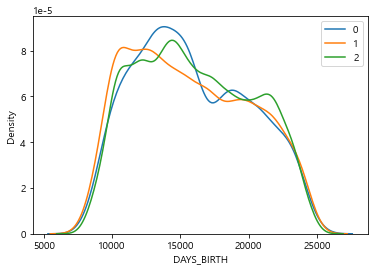

In [146]:
sns.distplot(train_00['DAYS_BIRTH'],label='0', hist=False)
sns.distplot(train_01['DAYS_BIRTH'],label='1', hist=False)
sns.distplot(train_02['DAYS_BIRTH'],label='2', hist=False)
plt.legend()

### 1등급(중간등급)은 최빈값이 가장 어렸을 때 몰려 있다. 
### 어린 사람은 중간등급을 받을 확률이 높다고 생각이 가능하다

### ---------------------

#### 실제 나이를 파악하기 위해 스케일링하지 않은 데이터로 측정해보았다.
#### DAYS_BIRTH는 살아온 날의 수를 음수로 나타낸거기 때문에 절대값처리 후 365로 나누어 본 데이터에 넣었다.

In [147]:
train_00['DAYS_BIRTH'] = train_00['DAYS_BIRTH'] / 365
train_01['DAYS_BIRTH'] = train_01['DAYS_BIRTH'] / 365
train_02['DAYS_BIRTH'] = train_02['DAYS_BIRTH'] / 365

In [148]:
train_00 = train_00.astype({'DAYS_BIRTH': 'int'})
train_01 = train_01.astype({'DAYS_BIRTH': 'int'})
train_02 = train_02.astype({'DAYS_BIRTH': 'int'})

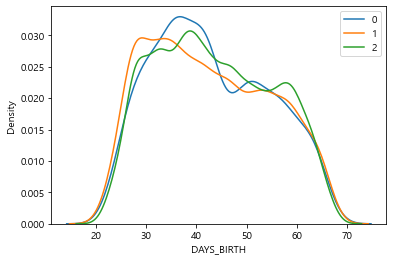

In [149]:
sns.distplot(train_00['DAYS_BIRTH'],label='0', hist=False)
sns.distplot(train_01['DAYS_BIRTH'],label='1', hist=False)
sns.distplot(train_02['DAYS_BIRTH'],label='2', hist=False)
plt.legend()

In [150]:
train_00['DAYS_BIRTH'].mean()

42.977653631284916

In [151]:
train_01['DAYS_BIRTH'].mean()

42.600606350726025

In [152]:
train_02['DAYS_BIRTH'].mean()

43.48461810466761

In [153]:
from scipy.stats import mode

In [154]:
mode(train_00['DAYS_BIRTH'])

ModeResult(mode=array([37]), count=array([137]))

In [155]:
mode(train_01['DAYS_BIRTH'])

ModeResult(mode=array([28]), count=array([244]))

In [156]:
mode(train_02['DAYS_BIRTH'])

ModeResult(mode=array([37]), count=array([575]))

#### 평균에서는 큰 차이가 없지만 그래프과 최빈값 모두 확인했을 때, 
#### 1등급만 28살에 있다는 점을 알 수 있다.

## 7) 신용 등급 별 얼마나 일했는가 차이

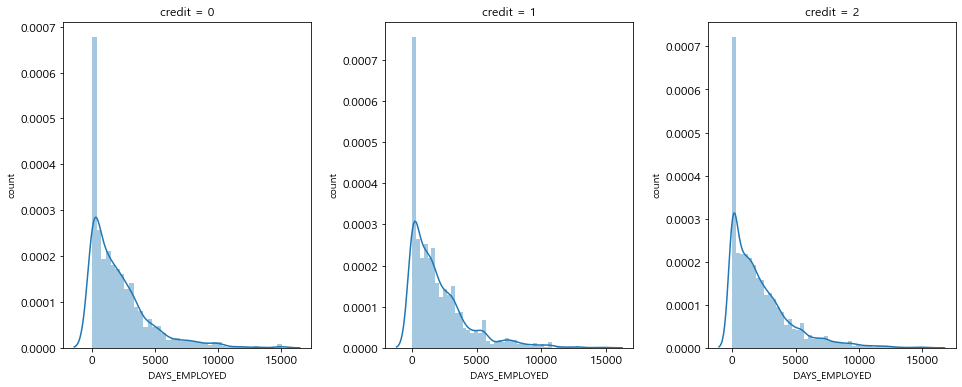

In [157]:
num_plot2("DAYS_EMPLOYED")

#### 세 등급 모두 큰 차이를 보이지 않는다.

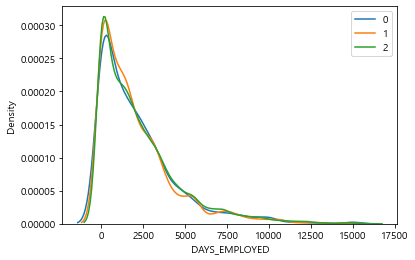

In [158]:
sns.distplot(train_00['DAYS_EMPLOYED'],label='0', hist=False)
sns.distplot(train_01['DAYS_EMPLOYED'],label='1', hist=False)
sns.distplot(train_02['DAYS_EMPLOYED'],label='2', hist=False)
plt.legend()

#### 그래프를 그려보면 밀도에 있어서는 약간의 차이가 있다. 
#### 1,2등급보다 0등급 DAYS_EMPLYED(일해온 날 수) 0에 덜 집중되어 있다는 것을 알 수 있다.
#### 일을 어느정도 해야 신용등급 최상급 0등급을 받을 확률이 올라갈 수 있다는 추측이 가능하다

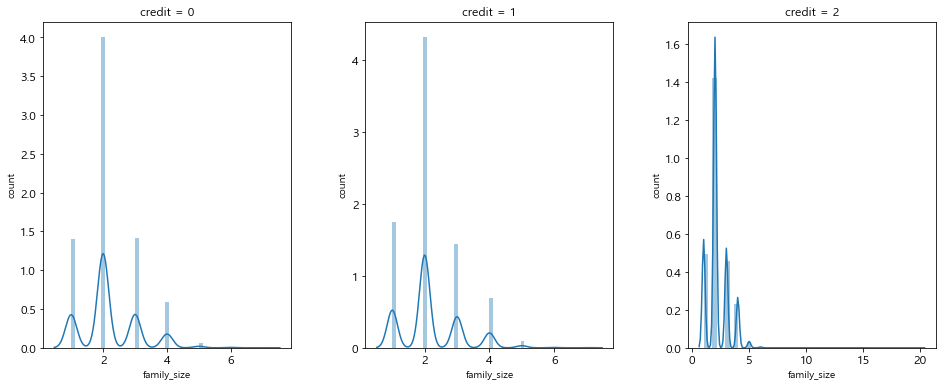

In [159]:
num_plot2("family_size")


#### 2등급만 faimlysize가 큰 사람이 보인다

In [160]:
train_00['family_size'].max()

7.0

In [161]:
train_01['family_size'].max()

7.0

In [162]:
train_02['family_size'].max()

20.0

In [163]:
train_00['family_size'].mean()

2.1942892613283673

In [164]:
train_01['family_size'].mean()

2.177118238391575

In [165]:
train_02['family_size'].mean()

2.2046204620462047

In [166]:
train_02[train_02['family_size']>7].count()

index            6
gender           6
car              6
reality          6
child_num        6
income_total     6
income_type      6
edu_type         6
family_type      6
house_type       6
DAYS_BIRTH       6
DAYS_EMPLOYED    6
FLAG_MOBIL       6
work_phone       6
phone            6
email            6
occyp_type       6
family_size      6
begin_month      6
credit           6
dtype: int64

#### 가족 구성원 수가 0등급은 최대 7명, 1등급은 최대 7명이지만 2등급에서만 갑자기 최대 20명이 된다.
#### 그렇지만 평균을 구했을 때는 서로 얼마 차이 나지 않는다.
#### 2등급 중 가족 구성원이 7명이 넘는 사람의 수를 구했을 때 6명밖에 없다는 것도 확인 가능하다.

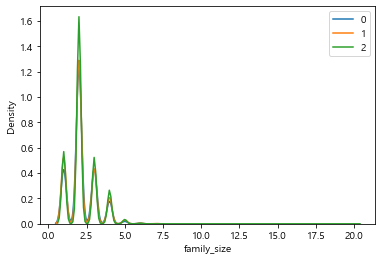

In [167]:
sns.distplot(train_00['family_size'],label='0', hist=False)
sns.distplot(train_01['family_size'],label='1', hist=False)
sns.distplot(train_02['family_size'],label='2', hist=False)
plt.legend()

#### 그래프를 겹쳐 보았을 때 2등급 중 가족 구성원이 7명이 넘는 사람의 수가 그래프를 특이하게 만든다. 

#### 이런 점 때문에서라도 위에서 MinMaxScaler로 차이를 좁혀줄 필요가 있었다.


## 7) 신용 등급 별 카드 발급 경과 차이

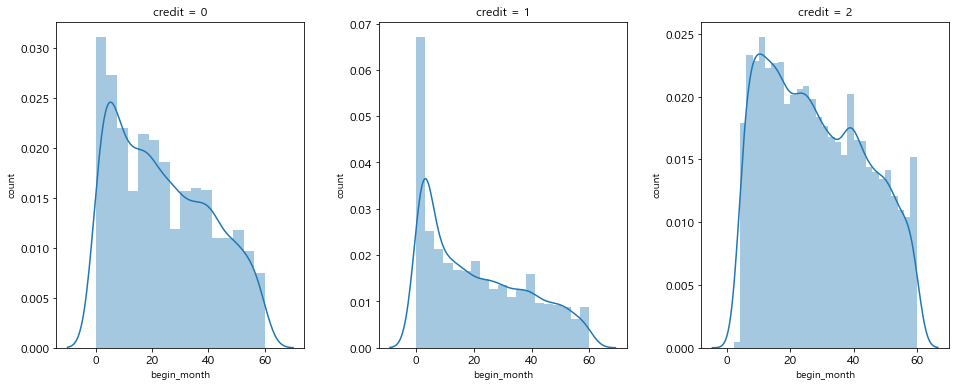

In [168]:
num_plot2("begin_month")

In [169]:
train_00["begin_month"].min()

0.0

In [170]:
train_01["begin_month"].min()

0.0

In [171]:
train_02["begin_month"].min()

2.0

#### 특이하게 카드 발급받은지 2개월 이전의 된 사람들 중 2등급은 없다.
#### 신용 등급이 낮은 사람에게 카드를 발급해주지 않기에 시작부터 2등급인 사람이 없을 것이라 추측이 가능하다.

In [172]:
train_02[train_02["begin_month"] < 3]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2421,2421,F,N,Y,0,67500.0,Working,Secondary / secondary special,Married,House / apartment,40,504,1,0,0,0,Cooking staff,2.0,2.0,2.0


In [173]:
train_02[train_02["begin_month"] < 4].count()

index            15
gender           15
car              15
reality          15
child_num        15
income_total     15
income_type      15
edu_type         15
family_type      15
house_type       15
DAYS_BIRTH       15
DAYS_EMPLOYED    15
FLAG_MOBIL       15
work_phone       15
phone            15
email            15
occyp_type       12
family_size      15
begin_month      15
credit           15
dtype: int64

In [174]:
train_01[train_01["begin_month"] < 4].count()

index            1327
gender           1327
car              1327
reality          1327
child_num        1327
income_total     1327
income_type      1327
edu_type         1327
family_type      1327
house_type       1327
DAYS_BIRTH       1327
DAYS_EMPLOYED    1327
FLAG_MOBIL       1327
work_phone       1327
phone            1327
email            1327
occyp_type        930
family_size      1327
begin_month      1327
credit           1327
dtype: int64

In [175]:
train_00[train_00["begin_month"] < 4].count()

index            375
gender           375
car              375
reality          375
child_num        375
income_total     375
income_type      375
edu_type         375
family_type      375
house_type       375
DAYS_BIRTH       375
DAYS_EMPLOYED    375
FLAG_MOBIL       375
work_phone       375
phone            375
email            375
occyp_type       253
family_size      375
begin_month      375
credit           375
dtype: int64

### 실제 인원에 비해 카드 발급 4개월 미만인 사람은 2등급에서 극단적으로 적다

In [176]:

mode(train_00["begin_month"])

ModeResult(mode=array([3.]), count=array([109]))

In [177]:
mode(train_01["begin_month"])

ModeResult(mode=array([3.]), count=array([470]))

In [178]:
mode(train_02["begin_month"])

ModeResult(mode=array([7.]), count=array([423]))

#### 그래프는 최빈값 이후로 감소의 형태를 가지는데,
#### 0,1등급은 4개월이전까지 수가 증가하다가 그 이후 감소,
#### 2등급은 8개월이전까지 수가 증가하다가 그 이후 감소한다
#### 카드 발급받은지 4~7개월에서는 0,1 등급의 수는 감소/ 2등급의 수는 증가하는 것으로 보아
#### 이 구간에서 신용등급이 떨어지는 경우가 많은 것을 알 수 있다

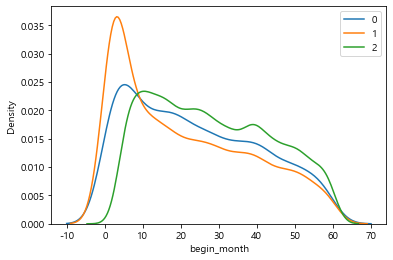

In [179]:
sns.distplot(train_00['begin_month'],label='0', hist=False)
sns.distplot(train_01['begin_month'],label='1', hist=False)
sns.distplot(train_02['begin_month'],label='2', hist=False)
plt.legend()

#### 특히 1등급(중간등급)받은 사람의 수가 3개월을 넘어가며 급감하는 것을 알 수 있다.

***
# 모델링 준비 테스트 데이터도 동일하게 전처리

In [180]:
data_test.head()

,gender,car,reality,income_total,income_type,family_size,family_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month
0,M,Y,N,112500.0,Pensioner,2.0,Civil marriage,-21990,365243,-60.0
1,F,N,Y,135000.0,State servant,2.0,Married,-18964,-8671,-36.0
2,F,N,Y,69372.0,Working,2.0,Married,-15887,-217,-40.0
3,M,Y,N,112500.0,Commercial associate,2.0,Married,-19270,-2531,-41.0
4,F,Y,Y,225000.0,State servant,2.0,Married,-17822,-9385,-8.0


In [181]:
gender_dummy2 = pd.get_dummies(data_test['gender']) #pd.get_dummies(데이터프레임 gender열), 명목형 데이터는 둘중 가중이 안붙으므로 더미로
gender_dummy2 

,F,M
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
9995,1,0
9996,0,1
9997,1,0
9998,1,0


In [182]:
data_test = pd.merge(data_test, gender_dummy2, on=data_test.index) #pd.merge 본래 데이터와 합치기

In [183]:
select_feature01 = ['F', 'M', 'car', 'reality', 'income_total', 'income_type', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [184]:
data_test = data_test[select_feature01]

In [185]:
car_dummy2 = pd.get_dummies(data_test['car']) #car도 명목형 데이터 
car_dummy2

,N,Y
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [186]:
data_test = pd.merge(data_test, car_dummy2, on=data_test.index)

In [187]:
select_feature02 = ['F', 'M', 'N', 'Y', 'reality', 'income_total', 'income_type', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [188]:
data_test = data_test[select_feature02]

In [189]:
data_test.columns = ['F', 'M', 'no_car', 'car', 'reality', 'income_total', 'income_type', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month'] #컬럼명 알 수 있게수정

In [190]:
reality_dummy2 = pd.get_dummies(data_test['reality'])
reality_dummy2

,N,Y
0,1,0
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
9995,0,1
9996,0,1
9997,0,1
9998,1,0


In [191]:
data_test = pd.merge(data_test, reality_dummy2, on=data_test.index)
data_test.head()

,key_0,F,M,no_car,car,reality,income_total,income_type,family_size,family_type,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,N,Y
0,0,0,1,0,1,N,112500.0,Pensioner,2.0,Civil marriage,-21990,365243,-60.0,1,0
1,1,1,0,1,0,Y,135000.0,State servant,2.0,Married,-18964,-8671,-36.0,0,1
2,2,1,0,1,0,Y,69372.0,Working,2.0,Married,-15887,-217,-40.0,0,1
3,3,0,1,0,1,N,112500.0,Commercial associate,2.0,Married,-19270,-2531,-41.0,1,0
4,4,1,0,0,1,Y,225000.0,State servant,2.0,Married,-17822,-9385,-8.0,0,1


In [192]:
select_feature03 = ['F', 'M', 'no_car', 'car', 'N', 'Y', 'income_total', 'income_type', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [193]:
data_test = data_test[select_feature03]

In [194]:
data_test.columns = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'income_total', 'income_type', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [195]:
incomeType_dummy2 = pd.get_dummies(data_test['income_type']) # 아것도 5개 간 서로 가중치를 부여하지 않게 1~5, 0~4개 아닌 더미변수로 처리
incomeType_dummy2

,Commercial associate,Pensioner,State servant,Student,Working
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
9995,0,0,0,0,1
9996,0,0,0,0,1
9997,0,0,0,0,1
9998,1,0,0,0,0


In [196]:
data_test = pd.merge(data_test, incomeType_dummy2, on=data_test.index)

In [197]:
select_feature04 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality', 'income_total', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working', 'family_size', 'family_type',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [198]:
data_test = data_test[select_feature04]

In [199]:
data_test['DAYS_EMPLOYED'] =  data_test['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)

In [200]:
data_test['DAYS_EMPLOYED'] = abs(data_test['DAYS_EMPLOYED']) #이상값 처리한 것 양수화

In [201]:
data_test['DAYS_BIRTH'] = abs(data_test['DAYS_BIRTH']) 
data_test['begin_month'] = abs(data_test['begin_month'])

In [202]:
data_test.loc[data_test['family_type'] == 'Civil marriage', 'family_type'] = 'Married'

In [203]:
data_test.loc[data_test['family_type'] != 'Married', 'family_type'] = 'not_Married'

In [204]:
familyType_dummy2 = pd.get_dummies(data_test['family_type']) #더미변수+위에서 했던 것과 동일하게 
familyType_dummy2

,Married,not_Married
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,1,0
9996,1,0
9997,1,0
9998,1,0


In [205]:
select_feature05 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality','income_total', 'Commercial associate', 'Pensioner', 'State servant', 'Student', 'Working', 'family_size', 'Married', 'not_Married',
                 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

In [206]:
data_test = pd.merge(data_test, familyType_dummy2, on=data_test.index)

In [207]:
data_test = data_test[select_feature05]
col3 = ['income_total',  'family_size', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

In [208]:
y = data_test[col3].values                          #value 가져오기
y

array([[1.1250e+05, 2.0000e+00, 2.1990e+04, 0.0000e+00],
       [1.3500e+05, 2.0000e+00, 1.8964e+04, 8.6710e+03],
       [6.9372e+04, 2.0000e+00, 1.5887e+04, 2.1700e+02],
       ...,
       [2.9250e+05, 2.0000e+00, 2.1016e+04, 1.4018e+04],
       [1.8000e+05, 2.0000e+00, 1.6541e+04, 1.0850e+03],
       [2.7000e+05, 2.0000e+00, 9.1540e+03, 1.8700e+02]])

In [209]:
min_max_scaler = preprocessing.MinMaxScaler() # value, MinMaxScaler처리 준비 0~1 상대값으로 다룰 것이므로 

In [210]:
y_scaled = min_max_scaler.fit_transform(y.astype(float)) #MinMaxScaler처리 . 실수!

In [211]:
y_scaled

array([[0.05523256, 0.16666667, 0.82098171, 0.        ],
       [0.06976744, 0.16666667, 0.64966314, 0.55366835],
       [0.02737209, 0.16666667, 0.47545717, 0.01385608],
       ...,
       [0.17151163, 0.16666667, 0.76583819, 0.89508971],
       [0.09883721, 0.16666667, 0.51248372, 0.06928038],
       [0.15697674, 0.16666667, 0.09426485, 0.01194049]])

In [212]:
data_test_norm = pd.DataFrame(y_scaled, columns=col3) # 위의 배열 데이터프레임화

In [213]:
data_test_norm

,income_total,family_size,DAYS_BIRTH,DAYS_EMPLOYED
0,0.055233,0.166667,0.820982,0.000000
1,0.069767,0.166667,0.649663,0.553668
2,0.027372,0.166667,0.475457,0.013856
3,0.055233,0.166667,0.666987,0.161612
4,0.127907,0.166667,0.585008,0.599259
...,...,...,...,...
9995,0.113372,0.166667,0.628659,0.346977
9996,0.113372,0.166667,0.192323,0.083967
9997,0.171512,0.166667,0.765838,0.895090
9998,0.098837,0.166667,0.512484,0.069280


In [214]:
col3 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality',
       'Commercial associate', 'Pensioner', 'State servant', 'Student',
       'Working', 'family_size', 'Married', 'not_Married', 'begin_month']

In [215]:
data_test_norm[col3] = data_test[col3] #위에서 새로 만든 데이터프레임에 나머지 열 붙이기 
data_test_norm.head()
data_test_norm.columns


Index(['income_total', 'family_size', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'F', 'M',
       'no_car', 'car', 'no_reality', 'reality', 'Commercial associate',
       'Pensioner', 'State servant', 'Student', 'Working', 'Married',
       'not_Married', 'begin_month'],
      dtype='object')

# 전처리의 검증을 위해 train데이터 분리해서 검증

In [216]:
import copy

In [217]:
data_train_copy_0 = copy.deepcopy(train_0)     #깊은 복사로 값 복사

In [218]:
data_train_copy_0

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,family_size,F,M,no_car,car,...,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff,Unknown,credit
3,0.000000,0.113372,0.423167,0.133138,0.616667,0.052632,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0.0
7,0.000000,0.156977,0.412163,0.344937,0.883333,0.052632,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0.0
12,0.052632,0.084302,0.242621,0.137593,1.000000,0.105263,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
15,0.105263,0.084302,0.295409,0.258130,1.000000,0.157895,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0.0
22,0.000000,0.084302,0.429472,0.086362,0.366667,0.052632,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26370,0.000000,0.142442,0.706425,0.165914,0.683333,0.000000,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
26384,0.052632,0.069767,0.190806,0.154076,0.750000,0.105263,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
26405,0.000000,0.273256,0.610821,0.136257,0.950000,0.052632,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0.0
26445,0.000000,0.098837,0.342867,0.263731,0.083333,0.052632,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0


In [219]:
data_train_copy_1 = copy.deepcopy(train_1)

In [220]:
data_train_copy_2 = copy.deepcopy(train_2)

In [221]:
data_train_copy_0.shape  #사이즈 확인

(3222, 57)

In [222]:
data_train_copy_1.shape

(6267, 57)

In [223]:
data_train_copy_2.shape

(16968, 57)

### 데이터 사이즈의 불균형을 해결하기 위해 3000개 씩만 가져와 데이터를 준비

In [224]:
#data_train_copy_0 = data_train_copy_0[0:3000]

In [225]:
#data_train_copy_0.shape

In [226]:
#data_train_copy_1 = data_train_copy_1[0:3000]

In [227]:
#data_train_copy_2 = data_train_copy_2[0:3000]

In [228]:
#data_train_copy_1.shape

In [229]:
#data_train_copy_2.shape

#### 데이터를 합치기 

In [230]:
#result = pd.concat([data_train_copy_0, data_train_copy_2])

In [231]:
#result

In [232]:
#result = pd.concat([result, data_train_copy_1])

In [233]:
#result

In [234]:
#result.to_csv("cred.csv")

### credit 데이터 빼고 문제를 위한 데이터프레임 만들기

In [235]:
col5 = ['F', 'M', 'no_car', 'car', 'no_reality', 'reality',
     'Commercial associate', 'Pensioner', 'State servant',
      'Student', 'Working', 'Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special', 'Married', 'not_Married',
      'Co-op apartment', 'House / apartment','Municipal apartment','Office apartment','Rented apartment', 'With parents', 'FLAG_MOBIL',
      'not_work_phone', 'work_phone', 'not_phone', 'phone', 'not_email',
      'email',  'Accountants', 'Cleaning staff', 'Cooking staff', 'Core staff',
      'Drivers', 'HR staff', 'High skill tech staff', 'IT staff', 'Laborers',
      'Low-skill Laborers', 'Managers', 'Medicine staff',
      'Private service staff', 'Realty agents', 'Sales staff', 'Secretaries',
      'Security staff', 'Waiters/barmen staff','Unknown','child_num','income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']

In [236]:
train_pre = data_train_norm[col5]
train_pre

,F,M,no_car,car,no_reality,reality,Commercial associate,Pensioner,State servant,Student,...,Secretaries,Security staff,Waiters/barmen staff,Unknown,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
0,1,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0.000000,0.113372,0.355018,0.299688,0.052632,0.100000
1,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0.052632,0.142442,0.210638,0.098008,0.105263,0.083333
2,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0.000000,0.273256,0.652376,0.282187,0.052632,0.366667
3,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0.000000,0.113372,0.423167,0.133138,0.052632,0.616667
4,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0.000000,0.084302,0.420244,0.133966,0.052632,0.433333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,1,0,1,0,1,0,0,0,1,0,...,0,0,0,0,0.105263,0.127907,0.250702,0.126265,0.157895,0.033333
26453,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0.052632,0.098837,0.434803,0.157513,0.052632,0.783333
26454,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0.000000,0.171512,0.136241,0.128238,0.052632,0.416667
26455,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0.000000,0.093023,0.139852,0.006810,0.000000,0.983333


## 학습을 위해 준비.  데이터 분리

In [237]:
from sklearn.model_selection import train_test_split  

In [238]:
X_train, X_test, y_train, y_test = train_test_split(train_pre, #문제 데이트프레임, 정답 제외
                                   data_train['credit'], #맞추어야할 정답
                                   test_size = 0.2, #테스트데이터 20% 지정, 훈련데이터 80% 할당
                                   random_state = 42) #seed값, 섞기 , seed값지정하면 같게 셔플링 학습할떄 안정적인 데이터로   
                                    
#데이터분리                                 

In [239]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21165 entries, 23445 to 23654
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   F                              21165 non-null  uint8  
 1   M                              21165 non-null  uint8  
 2   no_car                         21165 non-null  uint8  
 3   car                            21165 non-null  uint8  
 4   no_reality                     21165 non-null  uint8  
 5   reality                        21165 non-null  uint8  
 6   Commercial associate           21165 non-null  uint8  
 7   Pensioner                      21165 non-null  uint8  
 8   State servant                  21165 non-null  uint8  
 9   Student                        21165 non-null  uint8  
 10  Working                        21165 non-null  uint8  
 11  Academic degree                21165 non-null  uint8  
 12  Higher education               21165 non-n

In [240]:
X_test.info() #X 문제, 대문제 문제

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5292 entries, 19980 to 19272
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   F                              5292 non-null   uint8  
 1   M                              5292 non-null   uint8  
 2   no_car                         5292 non-null   uint8  
 3   car                            5292 non-null   uint8  
 4   no_reality                     5292 non-null   uint8  
 5   reality                        5292 non-null   uint8  
 6   Commercial associate           5292 non-null   uint8  
 7   Pensioner                      5292 non-null   uint8  
 8   State servant                  5292 non-null   uint8  
 9   Student                        5292 non-null   uint8  
 10  Working                        5292 non-null   uint8  
 11  Academic degree                5292 non-null   uint8  
 12  Higher education               5292 non-nul

In [241]:
y_train

23445    2.0
13278    2.0
9303     0.0
7794     1.0
10507    2.0
        ... 
21575    2.0
5390     2.0
860      2.0
15795    1.0
23654    2.0
Name: credit, Length: 21165, dtype: float64

In [242]:
X_train

,F,M,no_car,car,no_reality,reality,Commercial associate,Pensioner,State servant,Student,...,Secretaries,Security staff,Waiters/barmen staff,Unknown,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
23445,1,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0.105263,0.156977,0.319596,0.019856,0.105263,0.216667
13278,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0.000000,0.125000,0.425575,0.010819,0.052632,0.366667
9303,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0.105263,0.098837,0.255402,0.008082,0.157895,0.583333
7794,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0.105263,0.215116,0.170803,0.118564,0.157895,0.383333
10507,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0.000000,0.098837,0.347853,0.170814,0.000000,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.157895,0.069767,0.408838,0.097944,0.210526,0.783333
5390,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0.052632,0.027616,0.141113,0.052759,0.105263,0.766667
860,1,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0.000000,0.020349,0.742363,0.000000,0.052632,0.200000
15795,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.052632,0.055233,0.120708,0.054986,0.105263,0.583333


In [243]:
X_test

,F,M,no_car,car,no_reality,reality,Commercial associate,Pensioner,State servant,Student,...,Secretaries,Security staff,Waiters/barmen staff,Unknown,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,family_size,begin_month
19980,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0.000000,0.186047,0.160142,0.034685,0.000000,0.183333
9136,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.052632,0.122093,0.160887,0.113409,0.052632,0.116667
14905,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0.000000,0.136628,0.429759,0.451537,0.052632,0.883333
3919,1,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0.000000,0.055233,0.952714,0.000000,0.052632,0.233333
26239,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0.052632,0.142442,0.308420,0.122892,0.105263,0.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19897,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.105263,0.113372,0.340345,0.247120,0.157895,0.000000
12264,0,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0.000000,0.156977,0.623431,0.323554,0.052632,0.183333
17689,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.000000,0.026163,0.374563,0.100936,0.052632,0.650000
18503,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0.000000,0.055233,0.213618,0.052186,0.052632,0.100000


In [244]:
y_test

19980    2.0
9136     1.0
14905    2.0
3919     1.0
26239    2.0
        ... 
19897    1.0
12264    1.0
17689    2.0
18503    2.0
19272    2.0
Name: credit, Length: 5292, dtype: float64

In [245]:
from sklearn.model_selection import GridSearchCV



# 의사결정트리 

In [246]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV # 
#분석가가 변경가능한 파라메터를 "하이퍼파라메터"
#적절한 하이퍼 파라메터를 입력해야 학습 결과가 높음
#적절한 하이퍼 파라메터를 찾기 위한 방법이 GridSearch
dtree = DecisionTreeClassifier()
parameters = {'max_depth':[20,28,30], 'min_samples_split':[2,3]}
               #깊이                   #노드를 분할하기 위한 최소한의 샘플 데이터수 → 과적합을 제어하는데 사용



In [247]:
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
              ### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
              # param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  


In [248]:
grid_dtree.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 20, 'min_samples_split': 2}",0.652681,1,0.647768,0.648901,0.661375
1,"{'max_depth': 20, 'min_samples_split': 3}",0.647153,2,0.638271,0.649894,0.653296
2,"{'max_depth': 28, 'min_samples_split': 2}",0.618427,3,0.611339,0.625797,0.618143
3,"{'max_depth': 28, 'min_samples_split': 3}",0.608268,5,0.599008,0.615025,0.610773
4,"{'max_depth': 30, 'min_samples_split': 2}",0.614080,4,0.603118,0.625797,0.613324
5,"{'max_depth': 30, 'min_samples_split': 3}",0.604158,6,0.597307,0.611481,0.603685


In [246]:
from sklearn.metrics import accuracy_score

In [250]:
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42, min_samples_split = 2)
#공부시키기                      #트리의 최대 깊이, 값이 클 수록 복잡도 up
tree_clf.fit(X_train, y_train)   
#train데이터를 가지고 공부한 점수
tree_clf.score(X_train, y_train)

0.80066146940704

In [251]:
from sklearn.metrics import accuracy_score

y_pred = tree_clf.predict(X_test) #문제를 주고 풀어보라고 함. => 정답 return

#테스트데이터를 푼 답안과 해답을 비겨해서 정확도를 구해보자.
accuracy_score(y_test, y_pred)

0.6608087679516251

In [252]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(grid_dtree.predict(X_test), y_test))
# 혼동행렬 
print(classification_report(grid_dtree.predict(X_test), y_test))
# 분류성능평가

[[  98   88  144]
 [ 103  383  210]
 [ 449  791 3026]]
              precision    recall  f1-score   support

         0.0       0.15      0.30      0.20       330
         1.0       0.30      0.55      0.39       696
         2.0       0.90      0.71      0.79      4266

    accuracy                           0.66      5292
   macro avg       0.45      0.52      0.46      5292
weighted avg       0.77      0.66      0.70      5292



In [253]:
from sklearn.preprocessing import label_binarize
#더미변수처럼 0, 1, 2로 나누어 평가하기 위한 label_binarize

In [254]:
y_test3 = label_binarize(y_test, classes=[0,1,2])

In [255]:
y_test3 #정답

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [256]:
y_score = tree_clf.predict_proba(X_test)

In [257]:
y_score #각 클래스에 대한 확률

array([[0.        , 1.        , 0.        ],
       [0.        , 0.5       , 0.5       ],
       [0.07821229, 0.08938547, 0.83240223],
       ...,
       [0.10539097, 0.19378339, 0.70082564],
       [0.05882353, 0.23529412, 0.70588235],
       [0.04458599, 0.1656051 , 0.78980892]])

In [258]:

from sklearn.metrics import roc_curve, auc, roc_auc_score
                                        #auc : 곡선 아랫 부분 면적 측정
    
import matplotlib.pyplot as plt

# make sample data


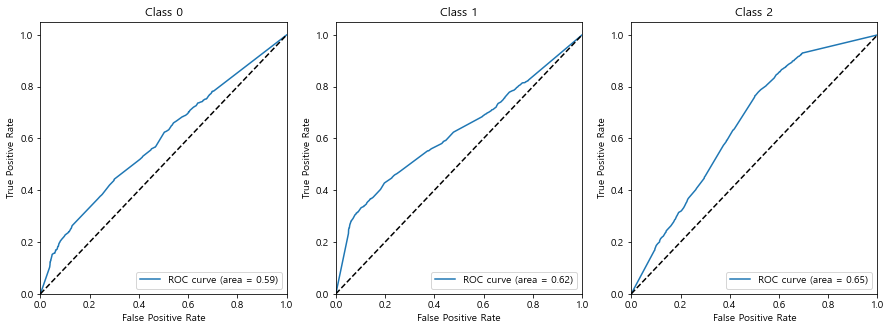

In [259]:
n_classes = 3
fpr = dict() #key와 value로 이루어진 딕셔너리
tpr = dict()
roc_auc = dict()
for i in range(n_classes): # 0, 1, 2등급으로 나뉘므로 3개
    fpr[i], tpr[i], _ = roc_curve(y_test3[:, i], y_score[:, i]) 
    #ruc_curve에 정답, 가능성을 입력 #fpr, tpr에 넣는다.
    roc_auc[i] = auc(fpr[i], tpr[i]) #라벨에 표시할 면적(정확도 점수)을 넣는다. 
 
# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)): 
    # enumerate() 함수는 기본적으로 인덱스(반복문 횟수)와 원소로 이루어진 tuple을 만들어줌
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0]) #0~1까지
    plt.ylim([0.0, 1.05])#0~1.05까지
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [260]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(grid_dtree.predict(X_test), y_test))
print(classification_report(grid_dtree.predict(X_test), y_test))

[[  98   88  144]
 [ 103  383  210]
 [ 449  791 3026]]
              precision    recall  f1-score   support

         0.0       0.15      0.30      0.20       330
         1.0       0.30      0.55      0.39       696
         2.0       0.90      0.71      0.79      4266

    accuracy                           0.66      5292
   macro avg       0.45      0.52      0.46      5292
weighted avg       0.77      0.66      0.70      5292



In [247]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [262]:
param_grid = {
    'n_estimators': [400, 500, 600],
    'max_depth': [9, 12, 15, 20],
    'min_samples_split': [1 ,2 ,3],
    'max_features': ['auto', 'sqrt'],
}

In [263]:
estimator = RandomForestRegressor()

In [264]:

rtree = RandomForestClassifier()

grid_dtree = GridSearchCV(rtree, param_grid=param_grid, cv=3, refit=True)
              ### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
              # param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
grid_dtree.fit(X_train, y_train)
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]


,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 9, 'max_features': 'auto', 'min_...",NaN,72,NaN,NaN,NaN
1,"{'max_depth': 9, 'max_features': 'auto', 'min_...",NaN,54,NaN,NaN,NaN
2,"{'max_depth': 9, 'max_features': 'auto', 'min_...",NaN,53,NaN,NaN,NaN
3,"{'max_depth': 9, 'max_features': 'auto', 'min_...",0.693220,39,0.694259,0.692984,0.692417
4,"{'max_depth': 9, 'max_features': 'auto', 'min_...",0.693173,41,0.694118,0.692984,0.692417
...,...,...,...,...,...,...
67,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.707820,8,0.709284,0.708009,0.706166
68,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.707158,12,0.706875,0.707300,0.707300
69,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.708906,5,0.709426,0.710843,0.706449
70,"{'max_depth': 20, 'max_features': 'sqrt', 'min...",0.710465,1,0.710843,0.712119,0.708434


In [266]:
#define grid_search
grid_search = GridSearchCV(estimator=estimator, 
                           param_grid=param_grid, 
                           cv=3, #교차분할할 수 
                          n_jobs=-1, 
                           # 병렬로 실행할 작업 수, -1이면 모든 프로세스 사용, 빠르지만 cpu 부담이 심함.
                         verbose=2
                           #자세한 정도를 제어, 높을수록 더 많은 메시지가 표시됨.
                          )

#fit with (X_train, y_train)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 12.8min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [9, 12, 15, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [400, 500, 600]},
             verbose=2)

In [267]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'n_estimators': 600}

# 랜덤포레스트

In [251]:
forest = RandomForestClassifier(max_features = 'auto',   #  최적의 분할을 위해 고려할 최대 feature 개수
                                #auto 전체 피처 중 √(피처개수) 만큼 선정 
                                #
                                max_depth = 21,  #최대 깊이
                                random_state = 53, #시드
                                n_estimators=600 #트리수
                                )
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=21, n_estimators=600, random_state=53)

In [249]:
print("학습용 데이터셋 정확도: {:.3f}".format(forest.score(X_train, y_train)))

학습용 데이터셋 정확도: 0.810


In [250]:
print("테스트용 데이터셋 정확도: {:.3f}".format(forest.score(X_test, y_test)))

테스트용 데이터셋 정확도: 0.709


In [261]:

print(confusion_matrix(forest.predict(X_test), y_test))
print(classification_report(forest.predict(X_test), y_test))

[[ 117   41   80]
 [  99  493  154]
 [ 434  728 3146]]
              precision    recall  f1-score   support

         0.0       0.18      0.49      0.26       238
         1.0       0.39      0.66      0.49       746
         2.0       0.93      0.73      0.82      4308

    accuracy                           0.71      5292
   macro avg       0.50      0.63      0.52      5292
weighted avg       0.82      0.71      0.75      5292



In [262]:
y_score = forest.predict_proba(X_test)

In [263]:
y_test = label_binarize(y_test, classes=[0,1,2])

In [264]:
y_test

array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

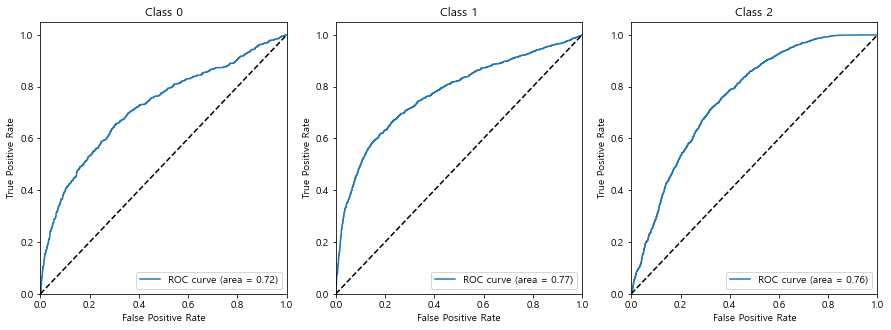

In [265]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [266]:

print(confusion_matrix(forest.predict(X_test), y_test))
print(classification_report(forest.predict(X_test), y_test))

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

### 랜덤 하이퍼 파라메터 중 최적의 학습 구간을 찾기 

In [ ]:
from random import *

    
    

In [ ]:
number = 0
maxD = 0
ranS = 0
bestS = 0
for _ in range(1000):
    number += 1
    maxD = randint(1, 100)
    ranS = randint(0, 300)
    tree_clf = DecisionTreeClassifier(max_depth=maxD, random_state=ranS)
    tree_clf.fit(X_train, y_train)
    y_pred = tree_clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))
    if bestS < accuracy_score(y_test, y_pred):
        bestS = accuracy_score(y_test, y_pred)
        print("최적 깊이 :", maxD , "최적 시드 :", ranS)
    print(number, ":" , bestS)
    
    

## 최적 깊이 : 36 최적 시드 : 228

In [ ]:
number = 0

bestS = 0
for _ in range(500):
    number += 1
    maxD = randint(1, 30)
    maxE = randint(100, 700)
    ranS = randint(0, 300)
    forest = RandomForestClassifier(max_depth=maxD, n_estimators=maxE, random_state=ranS)
    forest.fit(X_train, y_train)
    
    print("테스트용 데이터셋 정확도: {:.3f}".format(forest.score(X_test, y_test)))
   
    if bestS < forest.score(X_test, y_test):
        bestS = forest.score(X_test, y_test)
       
        print("최적 깊이 :", maxD, "최적 트리갯수 :", maxE , "최적 시드 :", ranS)
    print(number, ":" , bestS)
print("테스트용 데이터셋 정확도: {:.3f}".format(bestS))    
    

### 테스트용 데이터셋 정확도: 0.571
### 최적 트리갯수 : 354 최적 시드 : 43

### XGBoost 

In [ ]:

import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")#waring을 무시하도록 처리

In [ ]:
##### 모델 선언

model=xgb.XGBClassifier( 
                eta = 0.1,#학습률, 낮은 값일 수록 오버피팅 방지에 좋음
              max_depth=12, 
              min_child_weight=1, #과적합 조절용 
                    n_estimators=500, #부스트 트리 양, 
                    random_state=42,
                    gamma=1, #높을수록 정규화 높아짐, 깊이가 매우 깊어지면 사용할 높일 있음 
                    )




In [ ]:
model.fit(X_train, y_train)  # 모델 훈련

In [ ]:
model.score(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:

print(confusion_matrix(model.predict(X_test), y_test))
print(classification_report(model.predict(X_test), y_test))

In [ ]:
y_score = model.predict_proba(X_test)

In [ ]:
y_test2 = label_binarize(y_test, classes=[0,1,2])

In [ ]:
y_test2

In [ ]:
n_classes = 3
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(131+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

In [ ]:
# 모델측
clf = xgb.XGBClassifier()
parameters = {
    "eta"    : [0.1, 0.2, 0.3] ,
    "max_depth"        : [ 4, 6, 8, 12],
    "min_child_weight" : [ 1, 2, 3],
    "gamma"            : [ 0.0, 0.5, 1],
    }
grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_